In [3]:
#import packages used for this assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read volume and pressure data using pandas
df = pd.read_csv("volume_pressure_data.csv")

In [4]:
#display the first section of the volume and pressure dataset
df.head()

,Volume,Pressure
0,48,29.1250
1,46,30.5625
2,44,31.9375
3,42,33.5000
4,40,35.3125


In [5]:
#get data in volume and pressure columns
Volume_data = df["Volume"]
Pressure_data = df["Pressure"]

#create dictionary with mean, median and standard deviation and convert to dataframe
data = {
    "Volume" : {"Mean" : np.average(Volume_data),
                "Median" : np.median(Volume_data),
                "Standard Deviation" : np.std(Volume_data)},
    "Pressure" : {"Mean" : np.average(Pressure_data),
                  "Median" : np.median(Pressure_data),
                  "Standard Deviation" : np.std(Pressure_data)},
}
derived_vals = pd.DataFrame(data)

In [6]:
#display calculated values
derived_vals

,Volume,Pressure
Mean,27.120000,61.507500
Median,24.000000,58.812500
Standard Deviation,10.966567,25.318461


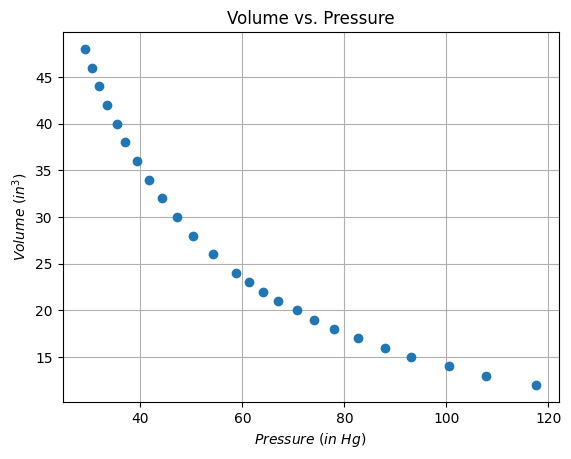

In [7]:
#plot Volume vs Pressure as a scatter plot
fig, ax = plt.subplot_mosaic([[0]])
ax[0].scatter(Pressure_data, Volume_data, zorder = 4)

#format plot
ax[0].set_title("Volume vs. Pressure")
ax[0].set_xlabel("$Pressure$ ($in$ $Hg$)")
ax[0].set_ylabel("$Volume$ $(in^3)$")
ax[0].grid()

#display plot
plt.show()


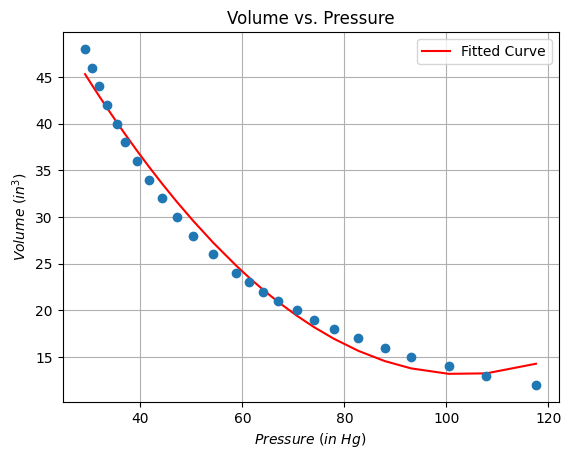

Fit equation is: 0.0058 * x^2 - 1.2023 * x + 75.3910


In [8]:
#make function to take results of fit and produce volumes for a set of pressure values
def fit_eq(fit,x):
    y = 0
    for coeff , power in zip(fit, range(len(fit))[::-1]):
        y += coeff * x ** power
    return y
        
#plot Volume vs Pressure as a scatter plot
fig, ax = plt.subplot_mosaic([[0]])
ax[0].scatter(Pressure_data, Volume_data, zorder = 4)

#fit curve to data and plot against data
fit = np.polyfit(Pressure_data, Volume_data, 2)
ax[0].plot(Pressure_data, fit_eq(fit, Pressure_data), color = "red", label = "Fitted Curve")


#format plot
ax[0].set_title("Volume vs. Pressure")
ax[0].set_xlabel("$Pressure$ ($in$ $Hg$)")
ax[0].set_ylabel("$Volume$ $(in^3)$")
ax[0].grid()
ax[0].legend()

#display plot
plt.show()

#display fit equation
print("Fit equation is: {:.4f} * x^2 - {:.4f} * x + {:.4f}".format(fit[0],-1 * fit[1], fit[2]))

In [9]:
# For an ideal gas, V is proportional to 1/P, so as P approaches infinity, V should approach 0. For the fit displayed in the plot above, as P goes to infinity,  V also goes to infinity. 
# Because V will eventually increase with increasing pressure values, this relationship does not make sense in terms of gas behavior. 

In [21]:
#Find root mean square error (RMSE) 
#RMSE = sqrt( sum((yr-yp)^2) / N) where N is number of points in pressure data, yr are the provided Volume data points, and yp are the predicted data points 

V_predicted = fit_eq(fit, Pressure_data)
difference = (Volume_data - V_predicted) ** 2

difference /= len(difference)
RMSE = np.sqrt(np.sum(difference))
print(RMSE)

1.2630791904743908


In [ ]:
#The RMSE value of 1.26 indicates that the fit equation fits the provided data reasonably well, though it could be imporved. 
#However, as mentioned before, the fit equation cannot be used to accurately predict volumes at pressures higher than those in the data set.